# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
## Import libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import data from csv:
df_raw = pd.read_csv('diabetes.csv')
df_raw.head(3)

print(df_raw)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## Preliminary EDA

### Step 1 - Description
1. What type of fields? 
2. How large is dataset?
3. How many categorical values (that will need encode or 1-hot) 
4. Prevalence on Nulls? 

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Outcome
0    500
1    268
Name: count, dtype: int64


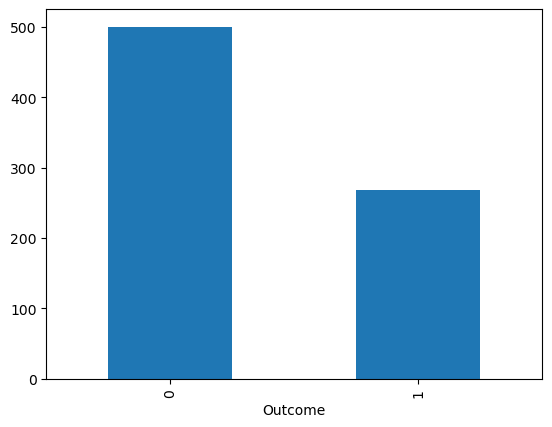

In [4]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df_raw["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df_raw.Outcome.value_counts())
plot=df_raw.Outcome.value_counts().plot(kind="bar")

**Findings #1:** 
* There are 9 fields in total (8 features, 1 target)
* 768 Records in total
* Do not appear to be any Nulls
* No categorical fields
* 3 calculated fields: BMI, Pedigree Function and Age.
* Age will likey need to be 'binned'

>35% of people in data set had Diabetes  
>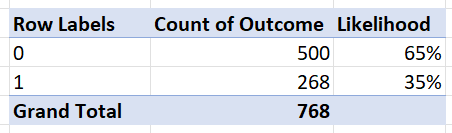

### Step 2 - Visualization 
* Create visualization of the 8 features
* Qualitatively identify outliers and or grouping

Tools:  
1) Histogram
2) Pairplot [ref: Medium](https://webcache.googleusercontent.com/search?q=cache:https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6)
3) Boxplots
4) 

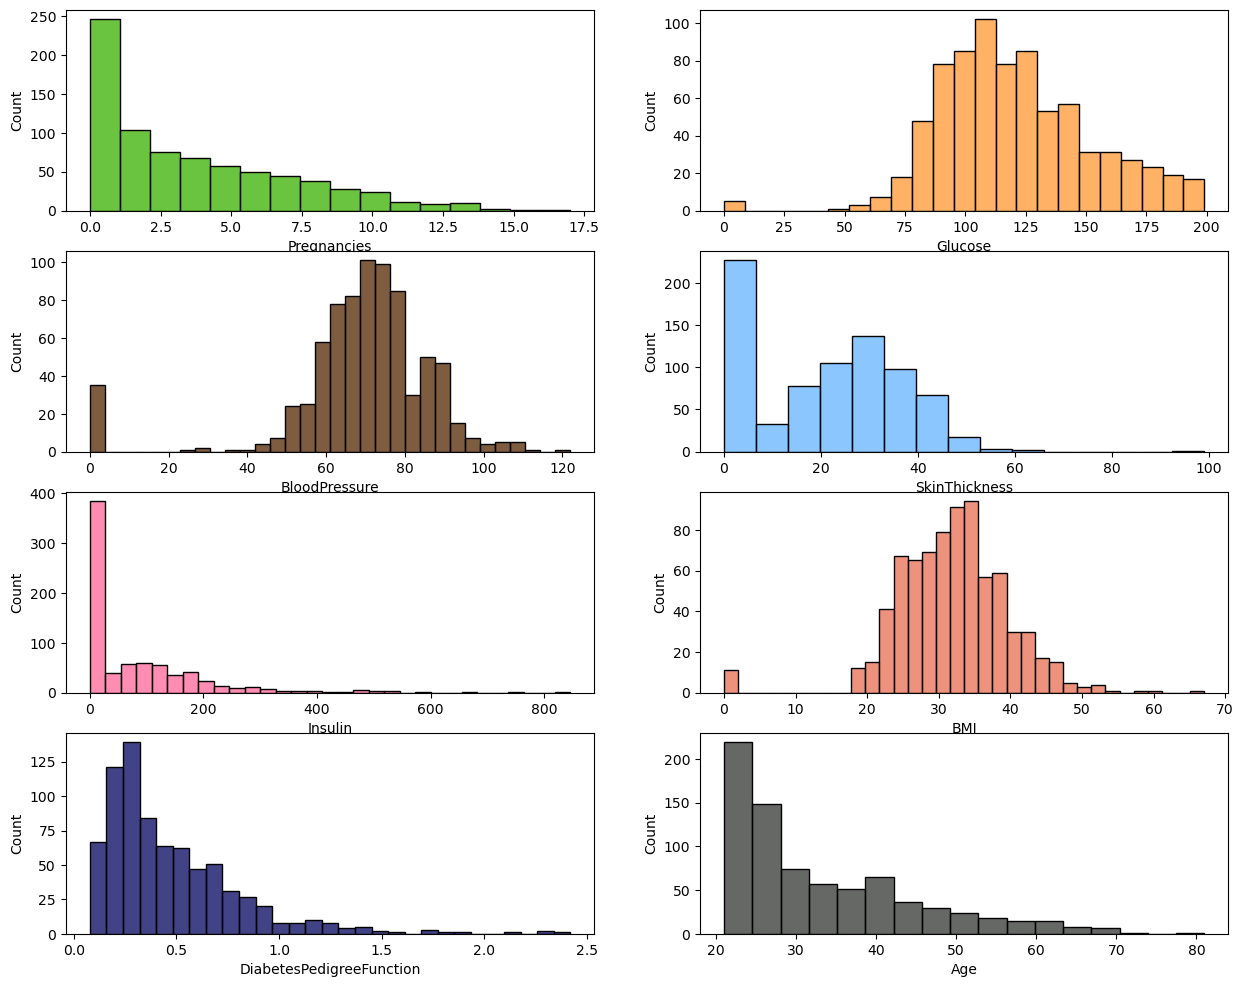

In [5]:
## Histograms

fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.histplot(df_raw['Pregnancies'],color='#38b000',ax=axs[0])
sns.histplot(df_raw['Glucose'],color='#FF9933',ax=axs[1])
sns.histplot(df_raw['BloodPressure'],color='#522500',ax=axs[2])
sns.histplot(df_raw['SkinThickness'],color='#66b3ff',ax=axs[3])
sns.histplot(df_raw['Insulin'],color='#FF6699',ax=axs[4])
sns.histplot(df_raw['BMI'],color='#e76f51',ax=axs[5])
sns.histplot(df_raw['DiabetesPedigreeFunction'],color='#03045e',ax=axs[6])
sns.histplot(df_raw['Age'],color='#333533',ax=axs[7])
plt.show()

c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


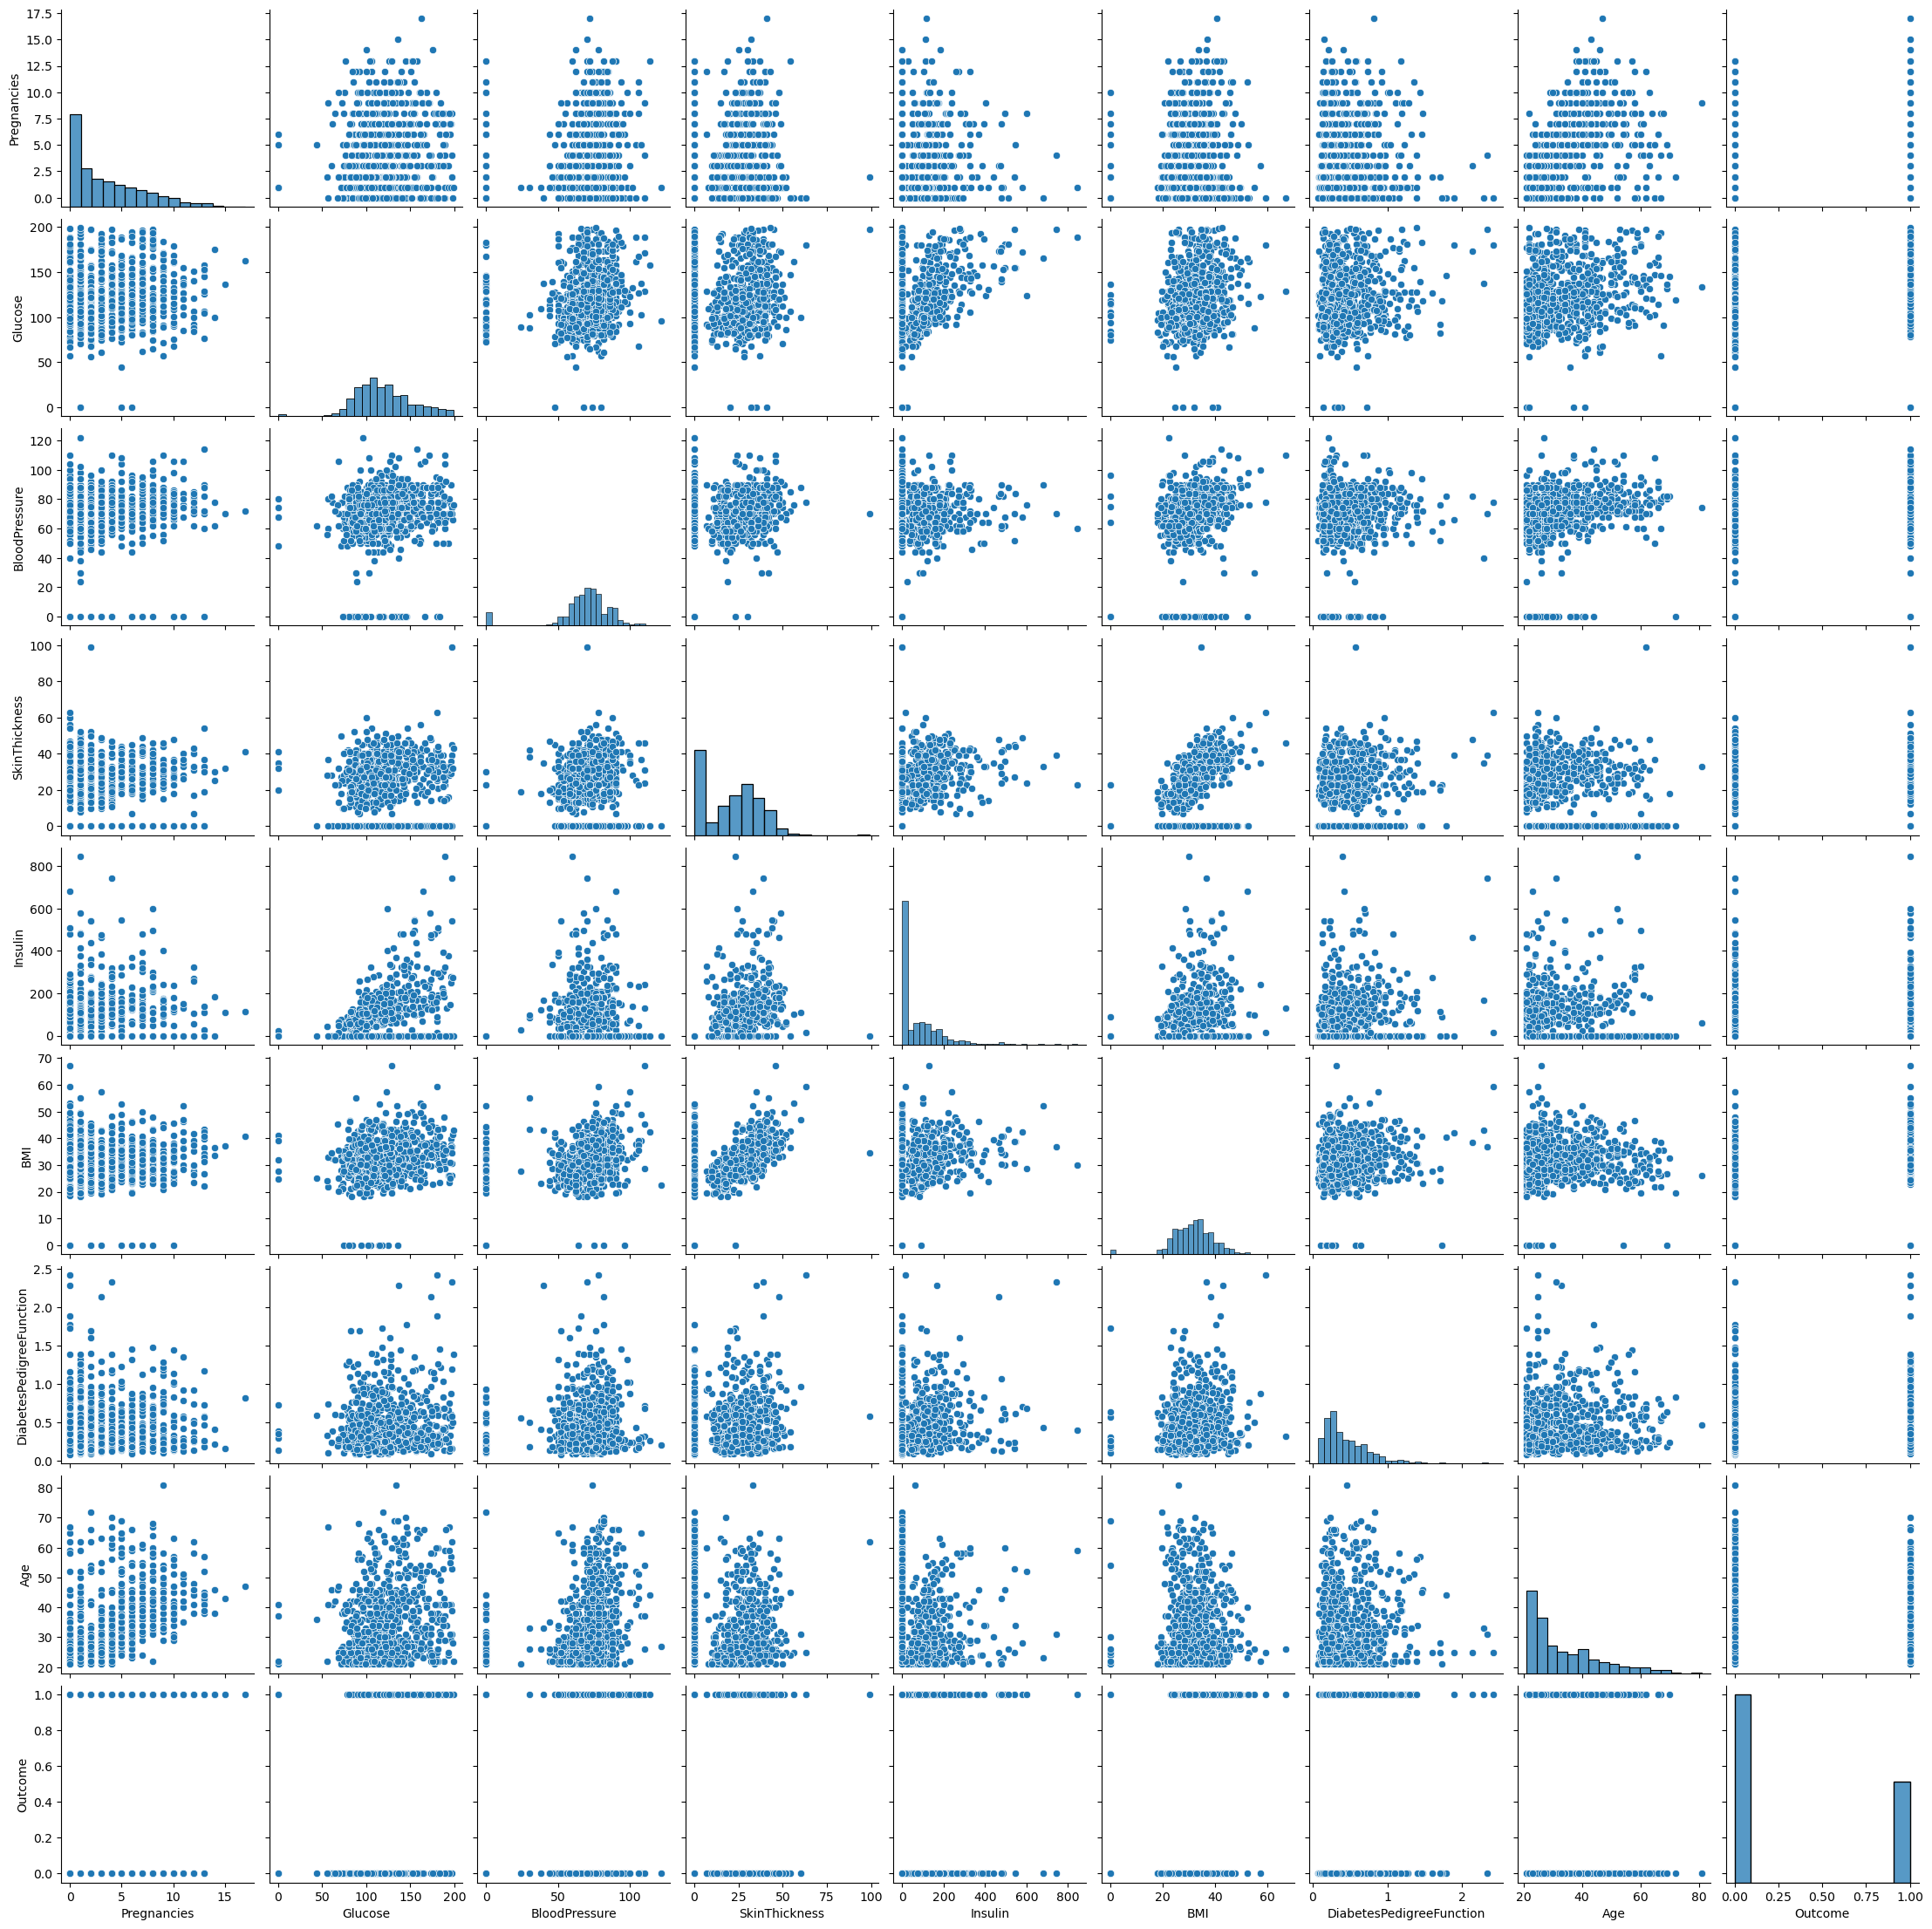

In [6]:
# Prepare a Pair plot 
sns.pairplot(df_raw, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


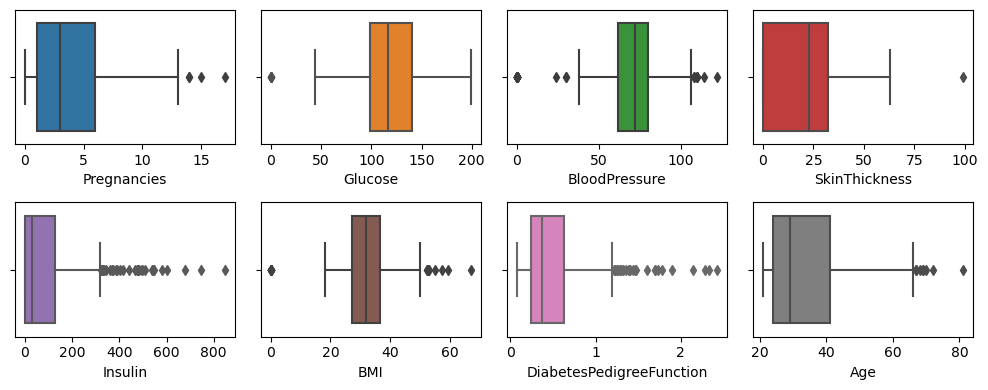

In [7]:
## Box Plots

#First obtain a list of all the features (slice the Outcome)
feature_list= df_raw.columns.tolist()[:-1]

## Revsion: Added a colour map because blue was not very interesting.
# Create a colormap
cmap = plt.get_cmap("tab10")

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 4))
axs = axs.flatten()

# Loop through subplots and add X labels
for i, ax in enumerate(axs):
    sns.boxplot(x=feature_list[i], data=df_raw, ax=ax,color=cmap(i % 10))  # Create boxplot
    ax.set_xlabel(feature_list[i])  # Add X label to each subplot

plt.tight_layout()  # Adjust subplot layout
plt.show()


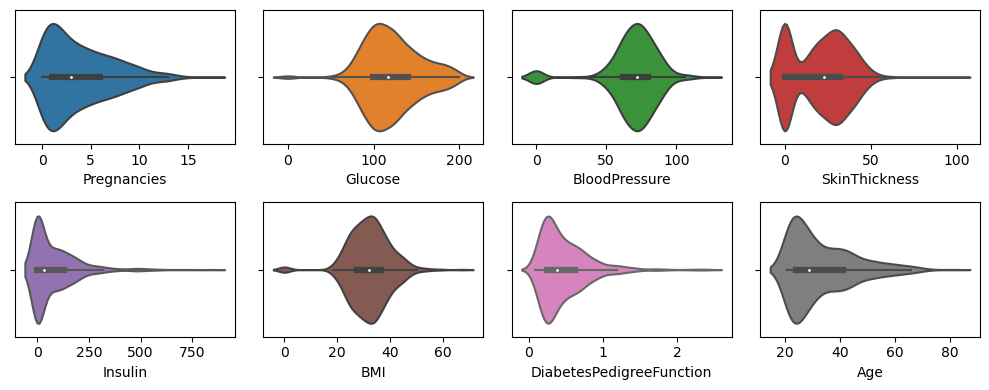

In [8]:
## VIOLIN Plots

#First obtain a list of all the features (slice the Outcome)
feature_list= df_raw.columns.tolist()[:-1]

## Revsion: Added a colour map because blue was not very interesting.
# Create a colormap
cmap = plt.get_cmap("tab10")

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 4))
axs = axs.flatten()

# Loop through subplots and add X labels
for i, ax in enumerate(axs):
    sns.violinplot(x=feature_list[i], data=df_raw, ax=ax,color=cmap(i % 10))  # Create boxplot
    ax.set_xlabel(feature_list[i])  # Add X label to each subplot

plt.tight_layout()  # Adjust subplot layout
plt.show()

### Inquiry Quesitons

In [9]:
# Average Age of those with Diabetes

df_diabetic = df_raw[df_raw['Outcome']==1].describe()
df_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [10]:
# First, compute the summary statistics for each outcome
summary_stats = df_raw[['Age','BMI','BloodPressure','Insulin','Outcome']].groupby('Outcome').describe()

# Now, pivot the DataFrame
consolidated_df = summary_stats.stack(level=0)

# Print the consolidated DataFrame
consolidated_df.T

Outcome           0                                                 1  \
                Age         BMI BloodPressure     Insulin         Age   
count    500.000000  500.000000    500.000000  500.000000  268.000000   
mean      31.190000   30.304200     68.184000   68.792000   37.067164   
std       11.667655    7.689855     18.063075   98.865289   10.968254   
min       21.000000    0.000000      0.000000    0.000000   21.000000   
25%       23.000000   25.400000     62.000000    0.000000   28.000000   
50%       27.000000   30.050000     70.000000   39.000000   36.000000   
75%       37.000000   35.300000     78.000000  105.000000   44.000000   
max       81.000000   57.300000    122.000000  744.000000   70.000000   

Outcome                                        
                BMI BloodPressure     Insulin  
count    268.000000    268.000000  268.000000  
mean      35.142537     70.824627  100.335821  
std        7.262967     21.491812  138.689125  
min        0.000000      0.000000    0.000000  
25%       30.800000     66.000000    0.000000  
50%       34.250000     74.000000    0.000000  
75%       38.775000     82.000000  167.250000  
max       67.100000    114.000000  846.000000

![Alt text](images/relationships_qualitative.png)

### Findings #2

* Difficult to speculate if there are significant relationships between data given the large number of outliers and "0"
* Woudl anticipate seeing a greater spread in BMI between disaese/no disease state (knowing weight is a significant factor)
* Insulin level does appear to be considerably higher in the disease cases, but this is not surprising depending on when sampling was taken. 
* Diabetes is characterized by reduced uptake of blood insulin (said differently, the highter insulin is a consequence of the disease state, not a factor)

# Part II : Preprocessing & Feature Engineering

In part I, several observations were made regarding data quality. The following tasks will be considered and taken as required.  
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

### Missing Values or Zero Values

* Confirm the counts for zero values
* Identify and Exclude nonrelevant features from further pre-processing
* Features included in additional pre-processing are: 
  * insuling
  * glucose
  * blood pressure
  * skin thickness
  * BMI
  * DPF
* Approach to fill 0 will be to insert the mean of from the disease state. 
  * Example : glucose = 0 for non-disease state will be populated with avg.glucsose from the non-disease state.
  * 

In [11]:
## Status of Nan or NULL
df_raw.info()

# We do not have any NULL records. [great!]
# But we suspect there are 0 [not great]
# With the exception of Pregnancy, we need to treat these as null. 
# What is scale of those null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
## Count the Zeros

# Use the Feature list to iterate through:
feature_list= df_raw.columns.tolist()[:-1]

for feature in feature_list:
    count_zeros = (df_raw[feature] == 0).sum()
    print(f'Total Zeros in {feature} = {count_zeros}')


Total Zeros in Pregnancies = 111
Total Zeros in Glucose = 5
Total Zeros in BloodPressure = 35
Total Zeros in SkinThickness = 227
Total Zeros in Insulin = 374
Total Zeros in BMI = 11
Total Zeros in DiabetesPedigreeFunction = 0
Total Zeros in Age = 0


In [13]:
## An alternative means of looking at 0 counts
for i in df_raw.columns:
    print((df_raw[i] == 0).value_counts())

Pregnancies
False    657
True     111
Name: count, dtype: int64
Glucose
False    763
True       5
Name: count, dtype: int64
BloodPressure
False    733
True      35
Name: count, dtype: int64
SkinThickness
False    541
True     227
Name: count, dtype: int64
Insulin
False    394
True     374
Name: count, dtype: int64
BMI
False    757
True      11
Name: count, dtype: int64
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64
Age
False    768
Name: count, dtype: int64
Outcome
True     500
False    268
Name: count, dtype: int64


In [14]:
# df_fixed = df_raw.copy()

In [15]:
## Fill Zeros with mean of Disease category (outcome =1)

# Calculate the mean of non-zero 'Insulin' values where 'Outcome' is equal to 1
non_zero_mean = df_raw.loc[(df_raw['Outcome'] == 1) & (df_raw['Insulin'] != 0), 'Insulin'].mean()

# Filter the rows where 'Outcome' is equal to 1 and 'Insulin' is equal to 1
filtered_rows = (df_raw['Outcome'] == 1) & (df_raw['Insulin'] == 0)

# Replace the 'Insulin' values in the filtered rows with the mean
df_raw.loc[filtered_rows, 'Insulin'] = non_zero_mean


# # Confirm that it worked: 
print(df_raw[df_raw['Outcome']==1].describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  206.846154   
std       3.741239   31.939622      21.491812      17.679711   92.237987   
min       0.000000    0.000000       0.000000       0.000000   14.000000   
25%       1.750000  119.000000      66.000000       0.000000  175.000000   
50%       4.000000  140.000000      74.000000      27.000000  206.846154   
75%       8.000000  167.000000      82.000000      36.000000  206.846154   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254      0.0  
min      0.000000                  0.088000   2

In [16]:
## Fill INSULIN Zeros with mean of NON DISEASE category (outcome = 0)


# Calculate the mean of non-zero 'Insulin' values where 'Outcome' is equal to 0
non_zero_mean = df_raw.loc[(df_raw['Outcome'] == 0) & (df_raw['Insulin'] != 0), 'Insulin'].mean()

# Filter the rows where 'Outcome' is equal to 1 and 'Insulin' is equal to 0
filtered_rows = (df_raw['Outcome'] == 0) & (df_raw['Insulin'] == 0)

# Replace the 'Insulin' values in the filtered rows with the mean
df_raw.loc[filtered_rows, 'Insulin'] = non_zero_mean


# # Confirm that it worked: 
print(df_raw[df_raw['Outcome']==0].describe())

       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000  130.287879   
std       3.017185   26.1412      18.063075      14.889947   74.400559   
min       0.000000    0.0000       0.000000       0.000000   15.000000   
25%       1.000000   93.0000      62.000000       0.000000   95.000000   
50%       2.000000  107.0000      70.000000      21.000000  130.287879   
75%       5.000000  125.0000      78.000000      31.000000  130.287879   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
min      0.000000                  0.078000   21.000000      0.0 

In [17]:
## Count the Zeros to Confirm Insulin has been corrected.

# Use the Feature list to iterate through:
feature_list= df_raw.columns.tolist()[:-1]

for feature in feature_list:
    count_zeros = (df_raw[feature] == 0).sum()
    print(f'Total Zeros in {feature} = {count_zeros}')

df_raw.to_csv('Insulin-clean.csv')

Total Zeros in Pregnancies = 111
Total Zeros in Glucose = 5
Total Zeros in BloodPressure = 35
Total Zeros in SkinThickness = 227
Total Zeros in Insulin = 0
Total Zeros in BMI = 11
Total Zeros in DiabetesPedigreeFunction = 0
Total Zeros in Age = 0


In [18]:
## Blood Pressure: 

## Fill Zeros with mean of Disease category (outcome =1)

# Calculate the mean of non-zero 'BP' values where 'Outcome' is equal to 1
non_zero_mean = df_raw.loc[(df_raw['Outcome'] == 1) & (df_raw['BloodPressure'] != 0), 'BloodPressure'].mean()

# Filter the rows where 'Outcome' is equal to 1 and 'Insulin' is equal to 1
filtered_rows = (df_raw['Outcome'] == 1) & (df_raw['BloodPressure'] == 0)

# Replace the 'Insulin' values in the filtered rows with the mean
df_raw.loc[filtered_rows, 'BloodPressure'] = non_zero_mean


# # Confirm that it worked: 
print(df_raw[df_raw['Outcome']==1].describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      75.321429      22.164179  206.846154   
std       3.741239   31.939622      11.925638      17.679711   92.237987   
min       0.000000    0.000000      30.000000       0.000000   14.000000   
25%       1.750000  119.000000      68.000000       0.000000  175.000000   
50%       4.000000  140.000000      75.321429      27.000000  206.846154   
75%       8.000000  167.000000      82.000000      36.000000  206.846154   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254      0.0  
min      0.000000                  0.088000   2

In [19]:
## Blood Pressure: 

## Fill Zeros with mean of Disease category (outcome =0)

# Calculate the mean of non-zero 'BP' values where 'Outcome' is equal to 1
non_zero_mean = df_raw.loc[(df_raw['Outcome'] == 0) & (df_raw['BloodPressure'] != 0), 'BloodPressure'].mean()

# Filter the rows where 'Outcome' is equal to 1 and 'Insulin' is equal to 1
filtered_rows = (df_raw['Outcome'] == 0) & (df_raw['BloodPressure'] == 0)

# Replace the 'Insulin' values in the filtered rows with the mean
df_raw.loc[filtered_rows, 'BloodPressure'] = non_zero_mean


# # Confirm that it worked: 
print(df_raw[df_raw['Outcome']==0].describe())

       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      70.877339      19.664000  130.287879   
std       3.017185   26.1412      11.927450      14.889947   74.400559   
min       0.000000    0.0000      24.000000       0.000000   15.000000   
25%       1.000000   93.0000      63.500000       0.000000   95.000000   
50%       2.000000  107.0000      70.877339      21.000000  130.287879   
75%       5.000000  125.0000      78.000000      31.000000  130.287879   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
min      0.000000                  0.078000   21.000000      0.0 

In [20]:
## Count the Zeros to Confirm Insulin has been corrected.

# Use the Feature list to iterate through:
feature_list= df_raw.columns.tolist()[:-1]

for feature in feature_list:
    count_zeros = (df_raw[feature] == 0).sum()
    print(f'Total Zeros in {feature} = {count_zeros}')


Total Zeros in Pregnancies = 111
Total Zeros in Glucose = 5
Total Zeros in BloodPressure = 0
Total Zeros in SkinThickness = 227
Total Zeros in Insulin = 0
Total Zeros in BMI = 11
Total Zeros in DiabetesPedigreeFunction = 0
Total Zeros in Age = 0


In [21]:
## SkinThickness: 

## Fill Zeros with mean of Disease category (outcome =1)

# Calculate the mean of non-zero 'SkinThickness' values where 'Outcome' is equal to 0
non_zero_mean = df_raw.loc[(df_raw['Outcome'] == 1) & (df_raw['SkinThickness'] != 0), 'SkinThickness'].mean()

# Filter the rows where 'Outcome' is equal to 1 and 'Insulin' is equal to 1
filtered_rows = (df_raw['Outcome'] == 1) & (df_raw['SkinThickness'] == 0)

# Replace the 'Insulin' values in the filtered rows with the mean
df_raw.loc[filtered_rows, 'SkinThickness'] = non_zero_mean


# # Confirm that it worked: 
print(df_raw[df_raw['Outcome']==1].describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      75.321429      33.000000  206.846154   
std       3.741239   31.939622      11.925638       8.456099   92.237987   
min       0.000000    0.000000      30.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      30.000000  175.000000   
50%       4.000000  140.000000      75.321429      33.000000  206.846154   
75%       8.000000  167.000000      82.000000      36.000000  206.846154   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254      0.0  
min      0.000000                  0.088000   2

In [22]:
## SkinThickness: 

## Fill Zeros with mean of Disease category (outcome =0)

# Calculate the mean of non-zero 'SkinThickness' values where 'Outcome' is equal to 1
non_zero_mean = df_raw.loc[(df_raw['Outcome'] == 0) & (df_raw['SkinThickness'] != 0), 'SkinThickness'].mean()

# Filter the rows where 'Outcome' is equal to 1 and 'Insulin' is equal to 1
filtered_rows = (df_raw['Outcome'] == 0) & (df_raw['SkinThickness'] == 0)

# Replace the 'Insulin' values in the filtered rows with the mean
df_raw.loc[filtered_rows, 'SkinThickness'] = non_zero_mean


# # Confirm that it worked: 
print(df_raw[df_raw['Outcome']==0].describe())

df_raw.to_csv('fuck.csv')

       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      70.877339      27.235457  130.287879   
std       3.017185   26.1412      11.927450       8.516280   74.400559   
min       0.000000    0.0000      24.000000       7.000000   15.000000   
25%       1.000000   93.0000      63.500000      22.000000   95.000000   
50%       2.000000  107.0000      70.877339      27.235457  130.287879   
75%       5.000000  125.0000      78.000000      31.000000  130.287879   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
min      0.000000                  0.078000   21.000000      0.0 

In [23]:
## Count the Zeros to Confirm Insulin has been corrected.

# Use the Feature list to iterate through:
feature_list= df_raw.columns.tolist()[:-1]

for feature in feature_list:
    count_zeros = (df_raw[feature] == 0).sum()
    print(f'Total Zeros in {feature} = {count_zeros}')

Total Zeros in Pregnancies = 111
Total Zeros in Glucose = 5
Total Zeros in BloodPressure = 0
Total Zeros in SkinThickness = 0
Total Zeros in Insulin = 0
Total Zeros in BMI = 11
Total Zeros in DiabetesPedigreeFunction = 0
Total Zeros in Age = 0


### Outliers

* Primary outliers in this data set were the zero-value entries. 
* These have been addressed in the preceeding section. 
* The remaining outliers did not appear material in size and will remain. 
* The outliers will be reviewed depending on the model, and tuning paramters

### Scaling and Normalization

In [24]:
sc_X = StandardScaler()
df_scaled =  pd.DataFrame(sc_X.fit_transform(df_raw.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,-0.035389,0.645088,0.561272,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.531332,-0.027701,-0.300842,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.696647,0.420825,0.561272,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.531332,-0.700491,-0.709475,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-2.680419,0.645088,0.123830,1.409746,5.484909,-0.020496


In [25]:
df_scaled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.208935,0.094172,0.093546,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.222417,0.220943,0.477276,0.221071,0.137337,0.263514
BloodPressure,0.208935,0.222417,1.000000,0.203453,0.099996,0.239545,-0.002264,0.324439
SkinThickness,0.094172,0.220943,0.203453,1.000000,0.212573,0.503624,0.102426,0.135916
Insulin,0.093546,0.477276,0.099996,0.212573,1.000000,0.211624,0.121716,0.165149
BMI,0.017683,0.221071,0.239545,0.503624,0.211624,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002264,0.102426,0.121716,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.324439,0.135916,0.165149,0.036242,0.033561,1.000000


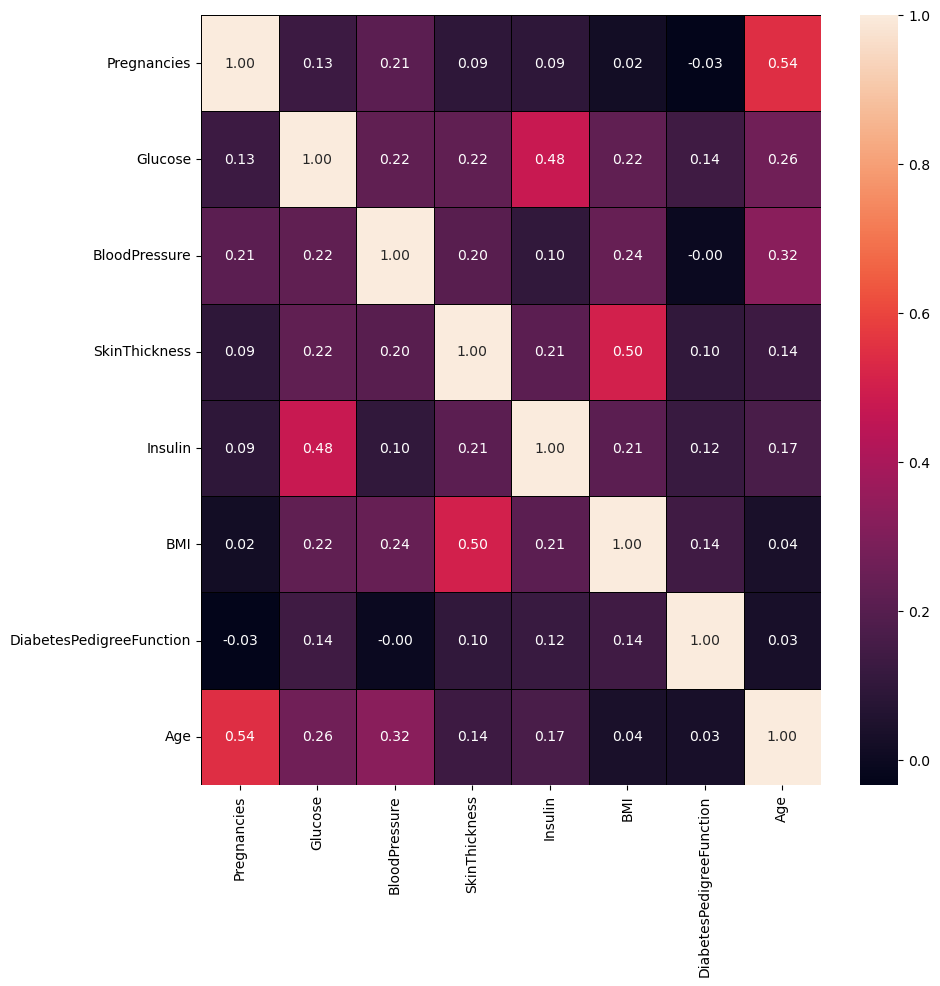

In [26]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_scaled.corr(), annot=True, linewidths=0.5, linecolor="black", fmt=".2f", ax=ax)
plt.show()

# Part III : Training ML Model

- Split the data between training and test.
- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. 
- Additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Model Summary and Library import

Models used in the unsupervised classification include: 
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Randon Forest

The metrics used to evaluate the effectiveness of each model include: 
* Accuracy Score
* Sensitivity
* Precision
* F1
* ROC
* AUG

In [27]:
# Import Logistic Regression Models
from sklearn.linear_model import LogisticRegression

# Import K-Nearest Neighbor Models
from sklearn.neighbors import KNeighborsClassifier

# Import Support Vector Machine Models
# from sklearn.svm import SVC

# Import Naive Bayes Models
# from sklearn.naive_bayes import GaussianNB

# Import Decision Tree Classification Models
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest Classification Models
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score, f1_score



In [28]:
## Split the Features and the Target

X = df_raw.drop(['Outcome'], axis=1)
y = df_raw['Outcome']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 85100)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((514, 8), (254, 8))

In [29]:
# check data types in X_train
## Confirm there are no categorical categories missed. 

X_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

### Data Frame for the Evaluation measures

* We will be creating a number of metrics through the various models. 
* Create a dataframe (ie table) to maintain all these measures. 
* Update the table with the measures automatically when evaluation is completed. 


In [30]:
result_data = pd.DataFrame(columns = ["Model_Name", "Sensitivity", "Specificity"])

## Logistic Regression: 


In [31]:
# Outline the Model Parameters
clf = LogisticRegression()

# Fit the Model to training the model
clf.fit(X_train, y_train)


c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#Predicting the output
y_pred = clf.predict(X_test)

print(y_pred)

[1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


### Evaluation: Logistic Regresssion

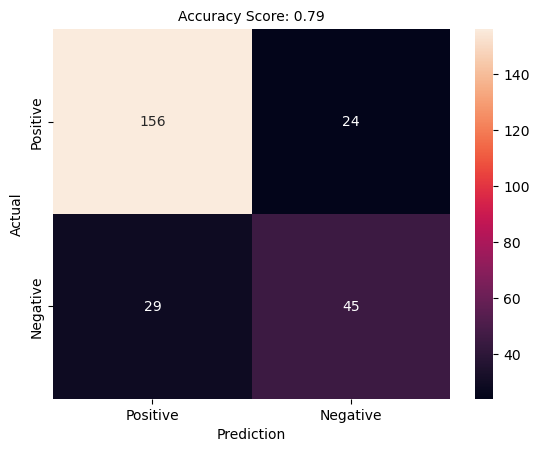

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       180
           1       0.65      0.61      0.63        74

    accuracy                           0.79       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.79      0.79      0.79       254

Sensitivity: 0.6081081081081081
Specificity: 0.8666666666666667


,Model_Name,Sensitivity,Specificity
0,Logistic Regression,0.608108,0.866667


In [33]:
# Confusion Matrix

def plot_confusion_matrix(y_test, y_pred):
    modelname= "Logistic Regression"
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
    sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title("Accuracy Score: {0}".format(acc), size=10)
    plt.show()

    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Calculate Sensitivity (True Positive Rate)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity (True Negative Rate)
    specificity = TN / (TN + FP)
    # Append the values to the Results DataFrame
    result_data.loc[len(result_data)] = [modelname,sensitivity, specificity]
    return sensitivity, specificity

sensitivity_log, specificity_log = plot_confusion_matrix(y_test, y_pred)  # Capture the returned values

print(classification_report(y_test, y_pred))
print(f"Sensitivity: {sensitivity_log}")
print(f"Specificity: {specificity_log}")
result_data

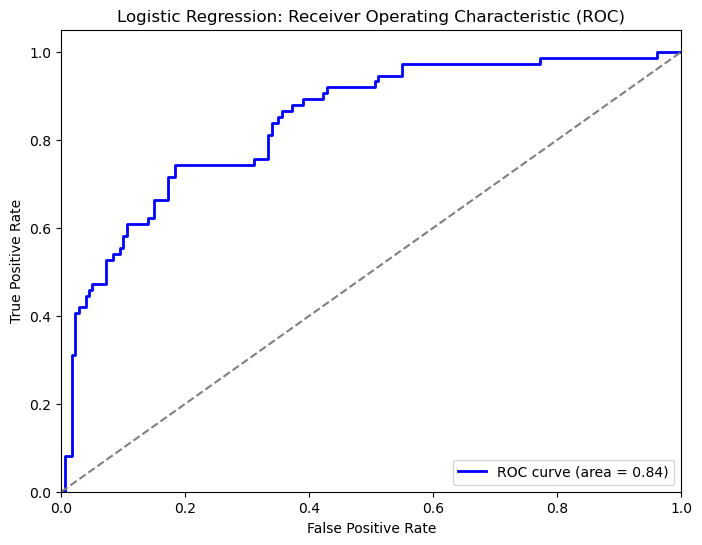

In [34]:
## ROC Visualization
Modelname = "Logistic Regression"
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Generate the ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graph it all together.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{Modelname}: Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## K-Nearest Neighbors

In [35]:
# Outline the Model Parameters
knn = KNeighborsClassifier(n_neighbors = 5)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = X_train, X_test, y_train, y_test

# Fit the Model
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [36]:
# KNN Prediction
y_pred_knn = knn.predict(X_test_knn)
print(y_pred_knn)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1]


### Evaluation: K-Nearest Neighbors


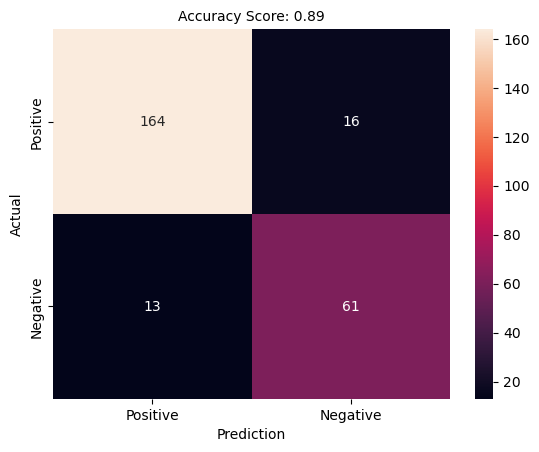

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       180
           1       0.79      0.82      0.81        74

    accuracy                           0.89       254
   macro avg       0.86      0.87      0.86       254
weighted avg       0.89      0.89      0.89       254

Sensitivity: 0.8243243243243243
Specificity: 0.9111111111111111


In [37]:
# Confusion Matrix

def plot_confusion_matrix(y_test_knn, y_pred_knn):
    modelname = "K-Nearest"
    acc = round(accuracy_score(y_test_knn, y_pred_knn), 2)
    cm = confusion_matrix(y_pred=y_pred_knn, y_true=y_test_knn)
    sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title("Accuracy Score: {0}".format(acc), size=10)
    plt.show()

    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Calculate Sensitivity (True Positive Rate)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity (True Negative Rate)
    specificity = TN / (TN + FP)
    # Append the values to the Results DataFrame
    result_data.loc[len(result_data)] = [modelname,sensitivity, specificity]
    return sensitivity, specificity

sensitivity_knn, specificity_knn = plot_confusion_matrix(y_test_knn, y_pred_knn)  # Capture the returned values

print(classification_report(y_test_knn, y_pred_knn))
print(f"Sensitivity: {sensitivity_knn}")
print(f"Specificity: {specificity_knn}")


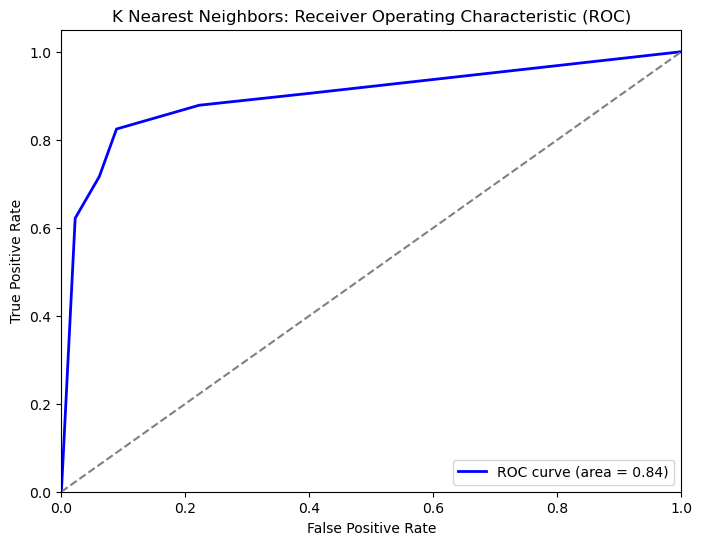

In [38]:
## ROC and AUC 

## ROC Visualization
Modelname = "K Nearest Neighbors"
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Generate the ROC 
fpr, tpr, thresholds = roc_curve(y_test_knn, y_pred_prob_knn)

# Calculate the Area Under Curve
roc_auc_knn = roc_auc_score(y_test_knn, y_pred_prob_knn)

# Graph it all together.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{Modelname}: Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [39]:
# Outline the Model Parameters
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree = X_train, X_test, y_train, y_test

# fit the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
#Prediction using the Model

y_pred_dtree = dtree.predict(X_test) 


### Evaluation - Decision Tree

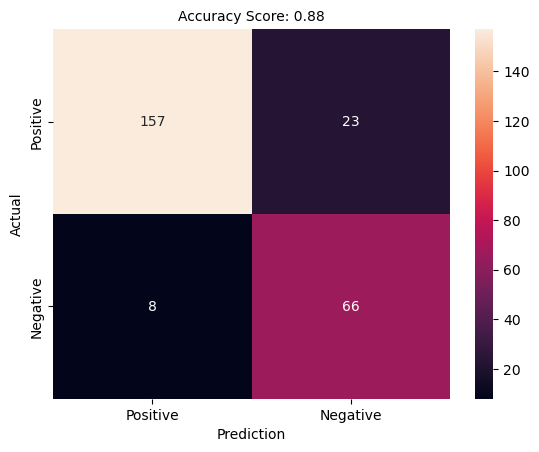

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       180
           1       0.74      0.89      0.81        74

    accuracy                           0.88       254
   macro avg       0.85      0.88      0.86       254
weighted avg       0.89      0.88      0.88       254

Sensitivity: 0.8918918918918919
Specificity: 0.8722222222222222


In [41]:
# Confusion Matrix

def plot_confusion_matrix(y_test_dtree, y_pred_dtree):
    modelname = "Decision Tree"
    acc = round(accuracy_score(y_test_dtree, y_pred_dtree), 2)
    cm = confusion_matrix(y_pred=y_pred_dtree, y_true=y_test_dtree)
    sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title("Accuracy Score: {0}".format(acc), size=10)
    plt.show()

    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Calculate Sensitivity (True Positive Rate)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity (True Negative Rate)
    specificity = TN / (TN + FP)
    # Append the values to the Results DataFrame
    result_data.loc[len(result_data)] = [modelname,sensitivity, specificity]
    
    return sensitivity, specificity

sensitivity_dtree, specificity_dtree = plot_confusion_matrix(y_test_dtree, y_pred_dtree)  # Capture the returned values

print(classification_report(y_test_dtree, y_pred_dtree))
print(f"Sensitivity: {sensitivity_dtree}")
print(f"Specificity: {specificity_dtree}")


In [42]:
# result_data.drop_duplicates(inplace=True)
result_data

,Model_Name,Sensitivity,Specificity
0,Logistic Regression,0.608108,0.866667
1,K-Nearest,0.824324,0.911111
2,Decision Tree,0.891892,0.872222


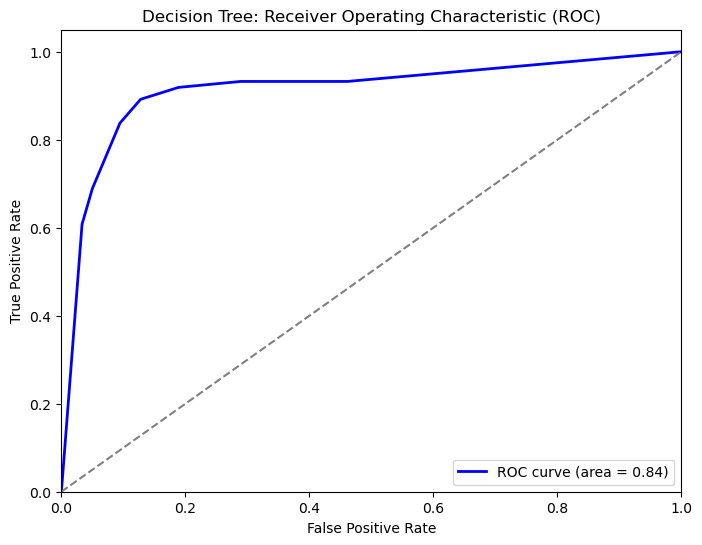

In [43]:
## ROC and AUC 

## ROC Visualization
Modelname = "Decision Tree"
y_pred_prob_dtree = dtree.predict_proba(X_test)[:, 1]

# Generate the ROC 
fpr, tpr, thresholds = roc_curve(y_test_dtree, y_pred_prob_dtree)

# Calculate the Area Under Curve
roc_auc_dtree = roc_auc_score(y_test_dtree, y_pred_prob_dtree)

# Graph it all together.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{Modelname}: Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [44]:
# instantiate the classifier with n_estimators = 100

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = X_train, X_test, y_train, y_test

# fit the model to the training set
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [45]:
# Predict on the test set results
y_pred_rfc = rfc.predict(X_test)


### Evaluation - Random Forest



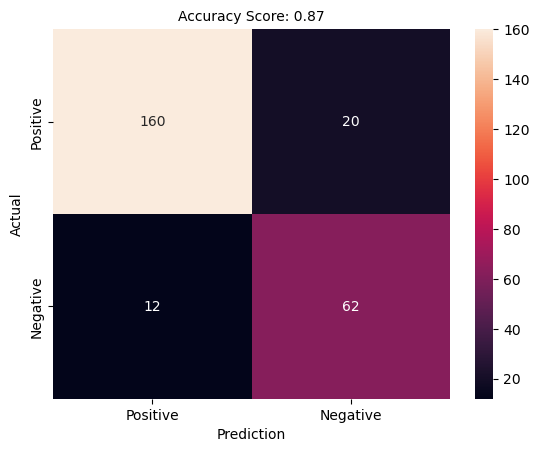

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       180
           1       0.76      0.84      0.79        74

    accuracy                           0.87       254
   macro avg       0.84      0.86      0.85       254
weighted avg       0.88      0.87      0.88       254

Sensitivity: 0.8378378378378378
Specificity: 0.8888888888888888


In [46]:
# Confusion Matrix

def plot_confusion_matrix(y_test_rfc, y_pred_rfc):
    modelname = "Random Forest"
    acc = round(accuracy_score(y_test_rfc, y_pred_rfc), 2)
    cm = confusion_matrix(y_pred=y_pred_rfc, y_true=y_test_rfc)
    sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title("Accuracy Score: {0}".format(acc), size=10)
    plt.show()

    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Calculate Sensitivity (True Positive Rate)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity (True Negative Rate)
    specificity = TN / (TN + FP)
    # Append the values to the Results DataFrame
    result_data.loc[len(result_data)] = [modelname,sensitivity, specificity]
    
    return sensitivity, specificity

sensitivity_rfc, specificity_rfc = plot_confusion_matrix(y_test_rfc, y_pred_rfc)  # Capture the returned values

print(classification_report(y_test_rfc, y_pred_rfc))
print(f"Sensitivity: {sensitivity_rfc}")
print(f"Specificity: {specificity_rfc}")


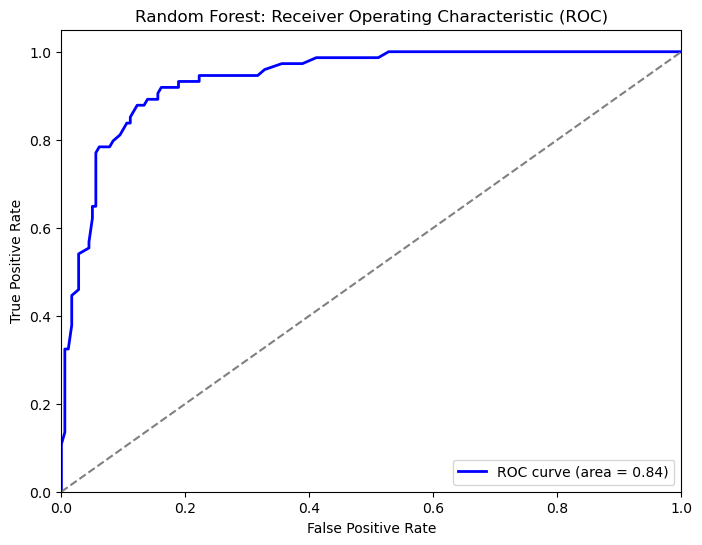

In [47]:
## ROC Visualization
Modelname = "Random Forest"
y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Generate the ROC 
fpr, tpr, thresholds = roc_curve(y_test_rfc, y_pred_prob_rfc)

# Calculate the Area Under Curve
roc_auc_rfc = roc_auc_score(y_test_rfc, y_pred_prob_rfc)

# Graph it all together.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{Modelname}: Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Part IV : Conclusion

Four machine learning models were developed following exploratory data analysis (EDA). The specificity and sensitivity of these models is provided below. The following conclusions can be made about the findings: 

1. None of the models in their current configuration offer satisfactory results for sensitivity (too many missed positives) or specificity (too many false positivies) to be considered a 'diagnostic' predictor.
2. Additional optimization efforts, such as Grid search, need to be undertaken to optimize the models to increase accuracy.
3. KNN appears to be the best model where the implications of False Positive are of great concern. (Example might be misdiagnosis of cancer)
4. Decision tree appear to be the most appropriate model in circumstances where the risk of a False Negative (ie missed Postive) is the greatest. Such an example might be in the case of a high-risk communicable disease, such as Covid. 
5. Given that Type 2 Diabetes is a preventable condition, with non-invasive interventions all of which improve overall health (ie diet and exercise), these models could be used to help inform clinicians and in turn patients of their risk factors and liklihood to acquire the disease. 

In [48]:
result_data

,Model_Name,Sensitivity,Specificity
0,Logistic Regression,0.608108,0.866667
1,K-Nearest,0.824324,0.911111
2,Decision Tree,0.891892,0.872222
3,Random Forest,0.837838,0.888889
